<a href="https://colab.research.google.com/github/ReubenCode/TensorFlow/blob/main/Copy_of_03_intro_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional neural networks with computer vision with tensorflow

computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

The images were working with are from the food101 data set from kaggel
we're only using 2 classes pizza and steak

**note** we start with a smaller dataset so we can experiment quickly and fiure out what works before scaling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-05-28 13:01:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.16, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   159MB/s    in 0.7s    

2022-05-28 13:01:24 (159 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.

and for a computer vision project this means visualizing many samples of your data set

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os
#walk through pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")


there are 2 directories and 0 images in 'pizza_steak
there are 2 directories and 0 images in 'pizza_steak/test
there are 0 directories and 250 images in 'pizza_steak/test/steak
there are 0 directories and 250 images in 'pizza_steak/test/pizza
there are 2 directories and 0 images in 'pizza_steak/train
there are 0 directories and 750 images in 'pizza_steak/train/steak
there are 0 directories and 750 images in 'pizza_steak/train/pizza


In [5]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 28 13:01 .
drwxr-xr-x 1 root root 4096 May 28 13:01 ..
drwxr-xr-x 4 root root 4096 May 28 13:01 test
drwxr-xr-x 4 root root 4096 May 28 13:01 train


In [6]:
# and other way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))

num_steak_images_train

750

#To visualize our images, first let's get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from sub directories
class_names = class_names[0:]
print(class_names)

['pizza' 'steak']


In [8]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # set up the target directory( we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['2279642.jpg']
Image shape: (512, 512, 3)


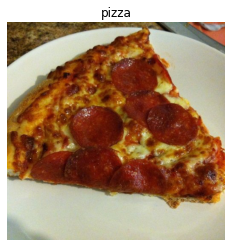

In [9]:
#view a random image from the training set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 89,  57,   0],
        [102,  70,   9],
        [105,  75,  15],
        ...,
        [179,  82,  14],
        [180,  87,  17],
        [185,  92,  22]],

       [[ 95,  64,   7],
        [103,  72,  15],
        [105,  74,  17],
        ...,
        [185,  95,  33],
        [179,  91,  28],
        [171,  86,  22]],

       [[101,  71,  17],
        [103,  73,  19],
        [102,  72,  20],
        ...,
        [174,  97,  45],
        [173,  97,  45],
        [169,  96,  43]],

       ...,

       [[161, 172, 155],
        [160, 172, 152],
        [159, 171, 151],
        ...,
        [179, 174, 152],
        [174, 169, 147],
        [172, 167, 147]],

       [[159, 170, 153],
        [160, 171, 154],
        [160, 173, 153],
        ...,
        [174, 169, 147],
        [172, 167, 145],
        [172, 167, 147]],

       [[156, 167, 150],
        [159, 172, 154],
        [161, 174, 154],
        ...,
        [171, 166, 14

In [11]:
# view image shape
img.shape # returns width, heights, colour channel

(512, 512, 3)

**note** neural networkds prefer values between 0 & 1 this is one of the most common preprocessing steps for working with images is to scale also know as normalized. their pixel values dividing the images arrays by 255. since 255 is the max pixel value

In [12]:
# get all the pixels values between 0 & 1
img/255

array([[[0.34901961, 0.22352941, 0.        ],
        [0.4       , 0.2745098 , 0.03529412],
        [0.41176471, 0.29411765, 0.05882353],
        ...,
        [0.70196078, 0.32156863, 0.05490196],
        [0.70588235, 0.34117647, 0.06666667],
        [0.7254902 , 0.36078431, 0.08627451]],

       [[0.37254902, 0.25098039, 0.02745098],
        [0.40392157, 0.28235294, 0.05882353],
        [0.41176471, 0.29019608, 0.06666667],
        ...,
        [0.7254902 , 0.37254902, 0.12941176],
        [0.70196078, 0.35686275, 0.10980392],
        [0.67058824, 0.3372549 , 0.08627451]],

       [[0.39607843, 0.27843137, 0.06666667],
        [0.40392157, 0.28627451, 0.0745098 ],
        [0.4       , 0.28235294, 0.07843137],
        ...,
        [0.68235294, 0.38039216, 0.17647059],
        [0.67843137, 0.38039216, 0.17647059],
        [0.6627451 , 0.37647059, 0.16862745]],

       ...,

       [[0.63137255, 0.6745098 , 0.60784314],
        [0.62745098, 0.6745098 , 0.59607843],
        [0.62352941, 0

## an end-to-end example
build a convolutional neural network to find patterns in our images

* load our images

*preprocess our images

*build a CNN to find patterns in our images

*compile our CNN

*fit the CNN to our training dats

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(42)

#preprocess data (get all tof the pixel values between 0 and 1 called scaling and normalization)
train_datagen = ImageDataGenerator(rescale=1./225)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/train"
#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="binary",
                                           seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#build a CNN model same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224, 224, 3)),
 tf.keras.layers.Conv2D(20, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")
#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 142s 3s/step - loss: 0.5563 - accuracy: 0.7167 - val_loss: 0.4279 - val_accuracy: 0.8087
Epoch 2/5
47/47 [==============================] - 131s 3s/step - loss: 0.4446 - accuracy: 0.8120 - val_loss: 0.4752 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 130s 3s/step - loss: 0.3984 - accuracy: 0.8273 - val_loss: 0.3567 - val_accuracy: 0.8567
Epoch 4/5
47/47 [==============================] - 129s 3s/step - loss: 0.3818 - accuracy: 0.8393 - val_loss: 0.3398 - val_accuracy: 0.8647
Epoch 5/5
47/47 [==============================] - 129s 3s/step - loss: 0.3301 - accuracy: 0.8673 - val_loss: 0.2966 - val_accuracy: 0.8907


**Note** if yur cell is taking longer then 10 seconds per epoch make sure you are using a GPU for your runtime

In [14]:
# get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 20)      1820      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 20)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      1810      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#poloclub.githib.io/cnn-explainer/

## using the ame model as before
replicate the model in the previous section

In [15]:
#set random seed
tf.random.set_seed(42)

#create a model to replicate
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 395ms/step - loss: 2.5492 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 321ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 322ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# get summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


# despite having 20x more parameters than our CNN model_2 performed terribly

In [17]:
# set random seed
tf.random.set_seed(42)
#create the model (same as above but lets step it up)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 392ms/step - loss: 4.6250 - accuracy: 0.5953 - val_loss: 0.7703 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 18s 386ms/step - loss: 0.9096 - accuracy: 0.7167 - val_loss: 0.5693 - val_accuracy: 0.7093
Epoch 3/5
47/47 [==============================] - 18s 389ms/step - loss: 0.6101 - accuracy: 0.7373 - val_loss: 0.7314 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 18s 385ms/step - loss: 0.7223 - accuracy: 0.7173 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 18s 388ms/step - loss: 0.4767 - accuracy: 0.7847 - val_loss: 0.4330 - val_accuracy: 0.8187


In [18]:
#get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary classification: let's break it down
1. become one with the data (visualize)
2.preprocess the data (prepare it for our model, the main step here was scaling/normalizing and turning our data into batches
3. create a model (start with baseline)
4. fit the model
5. evaluate the model
6. adjust different parameters and improve the model(try to beat our baseline)
7. repeat until satisfied (experiment)

1. ## become one with the date

['326587.jpg']
Image shape: (384, 512, 3)
['59445.jpg']
Image shape: (384, 512, 3)


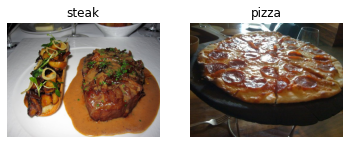

In [19]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

##2. preprocess the data (prepare it for a model)


In [20]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"

#Our next step is to turn out data into batches

Our next step is to turn our data into **batches**

A batch is a small subset of data. rather than looking at all -10,000 images at one time, a model might only look at 32 at a time

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of your processor
2. trying to learn patterns in 10,000 images in one hit could result in the model not being ale to learn very well.


In [21]:
#!nvidia-smi

In [22]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               target_size=(224,224), #target size of images (height . width)
                                               class_mode="binary", #type of data you're working with
                                               batch_size=32) # size of minibatches to load data into


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [24]:
# get a sampe of a train data set
images, labels = train_data.next() # get the next batch of images/labels from train data
len(images), len(labels)

(32, 32)

In [25]:
#how many batches are there?
len(train_data)

47

In [26]:
# get the first two images
images[:2], images[:2].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
# view the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

##3. create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when behinning a machine learning experimenting, you try to beat the baseline

**Note** start with something simple and see if it works with your data.

In [29]:
# make the creatiing of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# check the lengths of traiing and test data generators
len(train_data), len(test_data) 

(47, 47)

In [31]:
# create the model ( this will be our baseline, a layer convlutional eural network)
model_4 = Sequential([
                      Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more comples model)
                             kernel_size=3, #the size of the sliding window going across an input
                             strides=1, # the size of the step the sliding window takes across an input
                             padding="valid", #if "same", output shape is same as input shape, if  "valid", output shape gets compressed
                             activation="relu",
                             input_shape=(224,224,3)), #input layer (specify input shape)
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,   #this is a combination of labels and sample data)
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 125s 3s/step - loss: 1.0344 - accuracy: 0.7053 - val_loss: 0.4494 - val_accuracy: 0.7893
Epoch 2/5
47/47 [==============================] - 123s 3s/step - loss: 0.4261 - accuracy: 0.8187 - val_loss: 0.3399 - val_accuracy: 0.8613
Epoch 3/5
47/47 [==============================] - 123s 3s/step - loss: 0.2957 - accuracy: 0.8893 - val_loss: 0.1622 - val_accuracy: 0.9653
Epoch 4/5
47/47 [==============================] - 124s 3s/step - loss: 0.1398 - accuracy: 0.9613 - val_loss: 0.0739 - val_accuracy: 0.9900
Epoch 5/5
47/47 [==============================] - 124s 3s/step - loss: 0.0525 - accuracy: 0.9907 - val_loss: 0.0249 - val_accuracy: 0.9980


### 5. Evaluating our model
it looks like our model is learning something

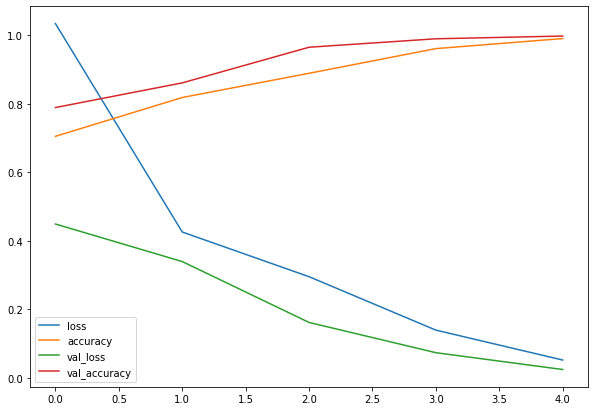

In [32]:
#plot training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [33]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation matrix
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuravy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_loss, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

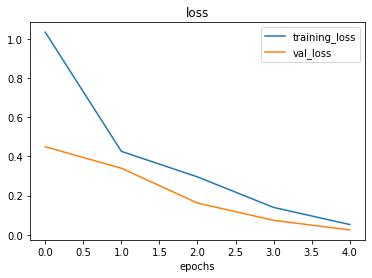

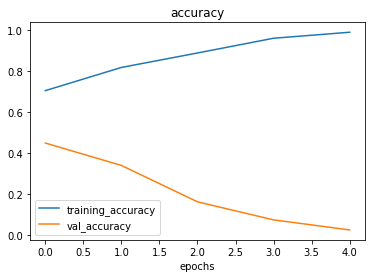

In [34]:
# check the loss and accuracy of model_4
plot_loss_curves(history_4)

## **Note** when a models **validation loss starts to increase, its likely that the model is **overfitting** the trainng dataset. 
This means its learning the patterns i the training dataset too well and thus the models ability to generalize to unseen data with deiminish

### 6. adjust the model parameters
Fitting a machine learning model comes in 3 steps
0. create a baseline
1. beat the baseline by overftting a larger model
2. reduce overfitting

ways to induce overfitting
* increase the number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our flattened layers

reduce overfitting
* Add data augmentation
* add regularization layers (such as MaxPool2D)
* add more data

In [35]:
# create the model ( this is going to be our new baseline)
model_5 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation="sigmoid")

])

In [36]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
# fir the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.5866 - accuracy: 0.6893 - val_loss: 0.4582 - val_accuracy: 0.7933
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.4720 - accuracy: 0.7893 - val_loss: 0.4045 - val_accuracy: 0.8247
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4207 - accuracy: 0.8147 - val_loss: 0.4148 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.3958 - accuracy: 0.8293 - val_loss: 0.4168 - val_accuracy: 0.8167
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.3905 - accuracy: 0.8247 - val_loss: 0.3795 - val_accuracy: 0.8413


In [38]:
#model_5 summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

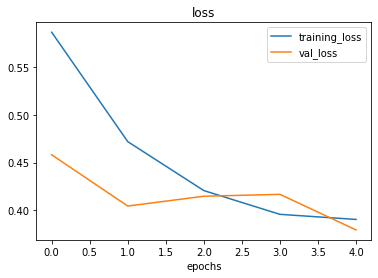

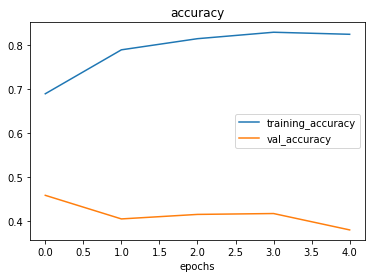

In [39]:
#plot loss curves
plot_loss_curves(history_5)

### finding data augmentation

In [40]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, #how much do you want to shear an image
                                             zoom_range=0.2, #zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on x-axis
                                             height_shift_range=0.2, #move image around on y-axis
                                             horizontal_flip=True) # do you want to flip an image
# Create ImaeDataGenerator witout data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator wthout data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training dat, leading it to have more diversity and in turn allowing our models to learn more generalization patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it

In [41]:
# import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only
# create non-augmented train data batches
print("non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224,224)
# create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 1500 images belonging to 2 classes.


**Note** data augmentation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model 

In [42]:
# get sample data batched
image, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only data (images)

showing image number: 26


(-0.5, 223.5, 223.5, -0.5)

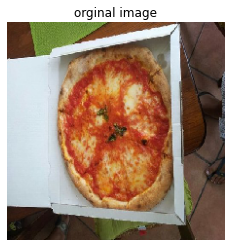

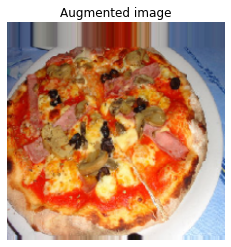

In [43]:
#show orginal image and augmented image
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"orginal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

#We've seen what augmented training data looks like. Lets build a model and see how it learns

In [44]:
# create the model
model_6 = Sequential([
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# fit the model
history_6 = model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.6980 - accuracy: 0.5573 - val_loss: 0.7701 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.7153 - accuracy: 0.4513 - val_loss: 0.6758 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 74s 2s/step - loss: 0.6846 - accuracy: 0.6080 - val_loss: 0.6131 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.6878 - accuracy: 0.5880 - val_loss: 0.6489 - val_accuracy: 0.7207
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.6423 - accuracy: 0.6987 - val_loss: 0.5222 - val_accuracy: 0.7780


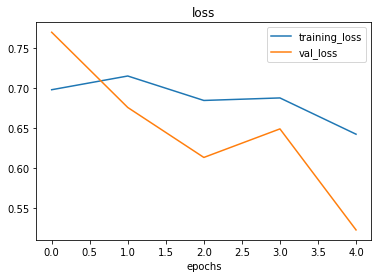

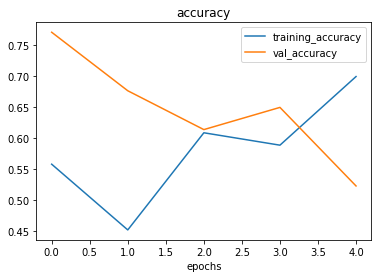

In [45]:
# check models training curves
plot_loss_curves(model_6.history)

shuffel augmented training model (same as before) and see what happens

In [46]:
# import data and augment it and shuffle from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      class_mode="binary",
                                                                      batch_size=32,
                                                                      shuffle=True) #shuffle data this time


Found 1500 images belonging to 2 classes.


In [47]:
# create the mode ( same as model 5 and model 6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#fit the model
history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 72s 2s/step - loss: 0.6517 - accuracy: 0.6140 - val_loss: 0.6010 - val_accuracy: 0.6967
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.5347 - accuracy: 0.7367 - val_loss: 0.4376 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.4883 - accuracy: 0.7660 - val_loss: 0.4432 - val_accuracy: 0.7853
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.4709 - accuracy: 0.7840 - val_loss: 0.4625 - val_accuracy: 0.7793
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.4861 - accuracy: 0.7593 - val_loss: 0.3968 - val_accuracy: 0.8193


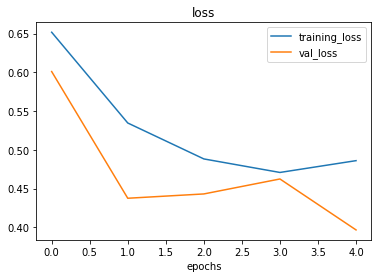

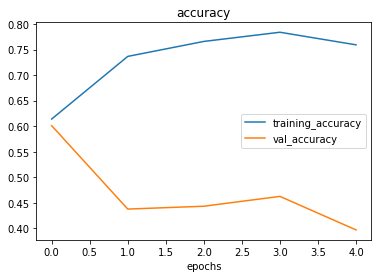

In [48]:
#plot loss curve
plot_loss_curves(history_7)

Ways to improve our model
* increase the number of model layers ( add more 'Conv2d) / 'MaxPool2d'
* increase number of filters ( from 10 t0 32 or 64 )
* train for longer ( more epochs )
* find ideal learning rate
* get more Data
* use **transfe learning** to leverage what another image model has learned 

## make a prediction with our trained model on our own custom data

In [49]:
#classes we're working with
print(class_names)

['pizza' 'steak']


--2022-05-28 13:47:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-05-28 13:47:08 (138 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



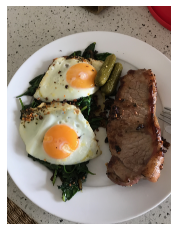

In [50]:
# view our image example
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);


In [51]:
# check shape
steak.shape

(4032, 3024, 3)

**Note** when you train a nural network and you want to make a prediction with it on your own custom data, it is import your custom data ( or new data) is preprocessed into the same format your model was trained on

In [52]:
# create a function to import an image and resize it to be able tobe used with our model
def load_and_prep_image(filename, img_shape=224):
  """ reads an image from filename, turns it into a tensor and resapes it to 
  (img_shape, colour_channels).
  """
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [53]:
#load in and preprocess our custom img
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [54]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.7547312]], dtype=float32)

Looks like our custom image is being out through our model. visualie the image as well as the prediction model


In [55]:
#remind ourselves f our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [56]:
#we can index the predicted class by rounding the prediction probability and indexing it on the class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [57]:
def pred_and_plot(model, filename, class_names=class_names):
  """ imports an image located at filename, makes a prediction with model and
       plots the image with the predicted class as the title
       """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ")
  plt.axis(False);


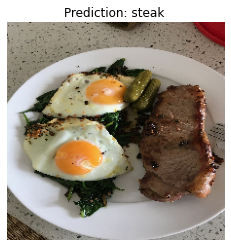

In [58]:
#test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Model works, let's try it on another image.. this time pizza

--2022-05-28 13:47:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-05-28 13:47:10 (228 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



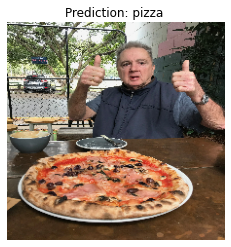

In [59]:
# download another test custom image and make a prediction
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

### multi-class image classification
1. become one with the data
2. preprocess the data ( get it ready for a model)
3. create a model (start with a baseline
4. fit the model (overfit it to make sure it works
5. evaluate the model
6. adjust different hyperparameters and improve the model (try to beat baseline/reduce
7. repeat until satisfied

## 1. import and become one with our data

In [60]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-28 13:47:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2022-05-28 13:47:14 (167 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import os
# walk through 10 classes of food images
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"Therer are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Therer are 2 directories and 0 images in '10_food_classes_all_data'.
Therer are 10 directories and 0 images in '10_food_classes_all_data/test'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
Therer are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'

In [62]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [63]:
#get class names
import pathlib
import numpy as np
data_dir= pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['799892.jpg']
Image shape: (384, 512, 3)


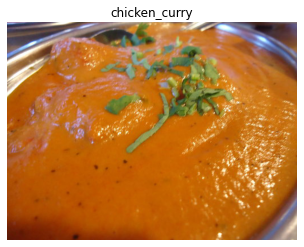

In [64]:
#visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. preprocess the data( prepare it for a model)

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = (224, 224)
#load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. create a model (start with baseline)



In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

# create our model very similar to previous models but actually the same as CNN explore
model_8 = Sequential([
      Conv2D(10, 3, input_shape=(224, 224, 3)),
      Activation(activation="relu"),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(10, activation="softmax") #change to have 10 output neurons and softmax activation function

])

#compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 448s 2s/step - loss: 2.1386 - accuracy: 0.2148 - val_loss: 1.9698 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 447s 2s/step - loss: 1.8781 - accuracy: 0.3511 - val_loss: 1.9456 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 445s 2s/step - loss: 1.5475 - accuracy: 0.4801 - val_loss: 1.9669 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 446s 2s/step - loss: 0.9473 - accuracy: 0.6879 - val_loss: 2.3959 - val_accuracy: 0.2948
Epoch 5/5
235/235 [==============================] - 445s 2s/step - loss: 0.3467 - accuracy: 0.8981 - val_loss: 3.3172 - val_accuracy: 0.2788


In [67]:
# evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 46s 578ms/step - loss: 3.3172 - accuracy: 0.2788


[3.3172175884246826, 0.27880001068115234]

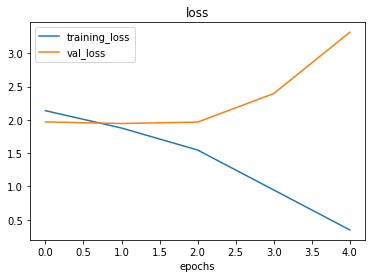

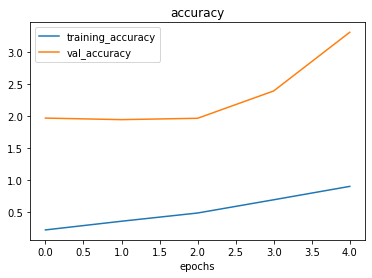

In [68]:
#check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

Model is **overfitting** the training set. its getting great reults on the training data but fails to generalize well unseen data and performs poorly on the test data

### 6. adjust the model hyperparameters to beat baseline/reduce overfitting
* get more data
* simplify the model
* use data augmentation
* use transfer learning

In [69]:
# try to simplify the model first
# remove 2 convolution layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
# compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")
#fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 214s 910ms/step - loss: 2.2980 - accuracy: 0.2177 - val_loss: 1.9876 - val_accuracy: 0.2968
Epoch 2/5
235/235 [==============================] - 214s 912ms/step - loss: 1.7748 - accuracy: 0.3947 - val_loss: 1.8542 - val_accuracy: 0.3616
Epoch 3/5
235/235 [==============================] - 215s 916ms/step - loss: 1.3828 - accuracy: 0.5437 - val_loss: 1.9948 - val_accuracy: 0.3316
Epoch 4/5
235/235 [==============================] - 216s 919ms/step - loss: 0.9455 - accuracy: 0.7029 - val_loss: 2.2136 - val_accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 217s 923ms/step - loss: 0.5634 - accuracy: 0.8388 - val_loss: 2.7742 - val_accuracy: 0.2956


In [70]:
# create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True) 
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [71]:
#create another model, fit it on augmented training data
model_10 = tf.keras.models.clone_model(model_8)

#compile the cloned model using the same setup as previous models
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])
#fir the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 512s 2s/step - loss: 2.2065 - accuracy: 0.1880 - val_loss: 2.0248 - val_accuracy: 0.2712
Epoch 2/5
235/235 [==============================] - 512s 2s/step - loss: 2.0898 - accuracy: 0.2452 - val_loss: 1.9712 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 513s 2s/step - loss: 2.0465 - accuracy: 0.2728 - val_loss: 1.9294 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 513s 2s/step - loss: 2.0123 - accuracy: 0.2915 - val_loss: 1.8875 - val_accuracy: 0.3460
Epoch 5/5
235/235 [==============================] - 512s 2s/step - loss: 1.9694 - accuracy: 0.3075 - val_loss: 1.7819 - val_accuracy: 0.3908


In [72]:
model_8.evaluate(test_data)

79/79 [==============================] - 46s 582ms/step - loss: 3.3172 - accuracy: 0.2788


[3.3172175884246826, 0.27880001068115234]

In [73]:
model_10.evaluate(test_data)

79/79 [==============================] - 46s 583ms/step - loss: 1.7819 - accuracy: 0.3908


[1.781906247138977, 0.39079999923706055]

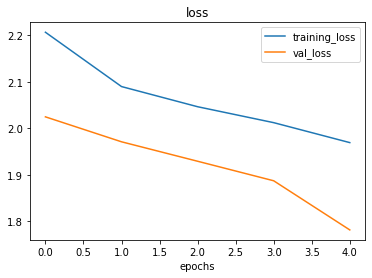

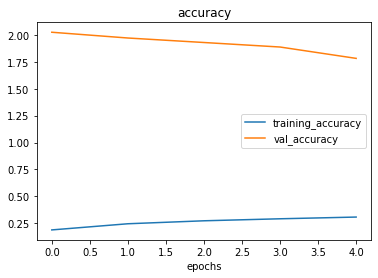

In [74]:
plot_loss_curves(history_10)

In [75]:
# make a prediction with our trained model
#class name reminder
class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [76]:
# download some custom images 
!wget /content/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

/content/03-pizza-dad.jpeg: Scheme missing.
--2022-05-28 15:35:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.02s   

2022-05-28 15:35:12 (220 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-05-28 15:35:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443...

In [77]:
# reconfig pred_and_plot to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """ imports an image located at filename, makes a prediction with model and
       plots the image with the predicted class as the title
       """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))


  # add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ")
  plt.axis(False);


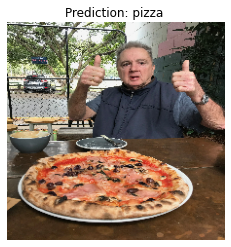

In [78]:
# make a prediction using model_10
pred_and_plot(model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

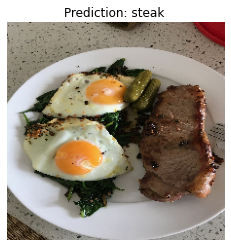

In [79]:
pred_and_plot(model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

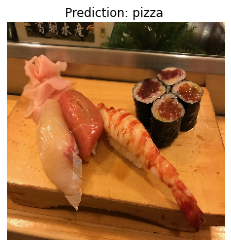

In [80]:
pred_and_plot(model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

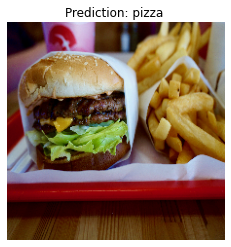

In [81]:
pred_and_plot(model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)